In [44]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
from numpy import argmax
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [45]:
#load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [46]:
#Define the categories
cat= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

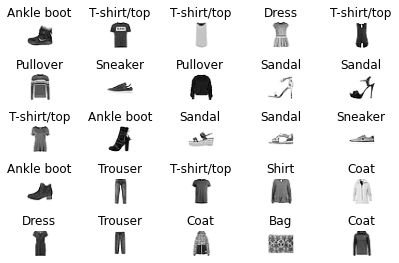

In [47]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.Greys)
    plt.tight_layout()
    plt.title(cat[y_train[i]])
    plt.axis('off')

In [48]:
# reshape and normalize the data
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test =  x_test.reshape(10000, 28, 28, 1)/255


In [49]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [50]:
#One hot encode the ylabels
y_train_ohe =to_categorical(y_train, num_classes=10, dtype='float32')
y_test_ohe =to_categorical(y_test, num_classes=10, dtype='float32')

# invert encoding
#inverted = argmax(y_train_ohe[1])
#print(inverted)

In [51]:
y_train_ohe.shape

(60000, 10)

In [52]:
#Instantiate the model
K.clear_session() 
model = Sequential ([
    Conv2D(filters= 70, kernel_size = (3,3), strides = (1,1), padding = 'same',
          input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2), strides=(2,2)),
    Activation('relu'),

    Flatten(),
    Dense(10),
    Activation('softmax')
    
]



)

In [53]:
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
cnn_fit = model.fit(x_train, y_train_ohe, batch_size=1000, epochs =15, validation_split = 0.3) #batch size for taking how many datapoint

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 65s 2ms/sample - loss: 0.9584 - acc: 0.7095 - val_loss: 0.5532 - val_acc: 0.8044
Epoch 2/15
42000/42000 [==============================] - 67s 2ms/sample - loss: 0.4877 - acc: 0.8335 - val_loss: 0.4453 - val_acc: 0.8442
Epoch 3/15
42000/42000 [==============================] - 62s 1ms/sample - loss: 0.4121 - acc: 0.8590 - val_loss: 0.3981 - val_acc: 0.8634
Epoch 4/15
42000/42000 [==============================] - 75s 2ms/sample - loss: 0.3776 - acc: 0.8711 - val_loss: 0.3755 - val_acc: 0.8693
Epoch 5/15
42000/42000 [==============================] - 95s 2ms/sample - loss: 0.3557 - acc: 0.8770 - val_loss: 0.3619 - val_acc: 0.8737
Epoch 6/15
42000/42000 [==============================] - 82s 2ms/sample - loss: 0.3371 - acc: 0.8845 - val_loss: 0.3432 - val_acc: 0.8815
Epoch 7/15
42000/42000 [==============================] - 69s 2ms/sample - loss: 0.3215 - acc: 0.8886 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


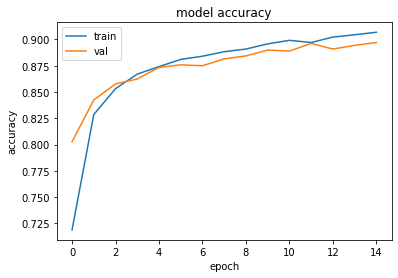

In [33]:
print(cnn_fit.history.keys())
# summarize history for accuracy
plt.plot(cnn_fit.history['acc'])
plt.plot(cnn_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()


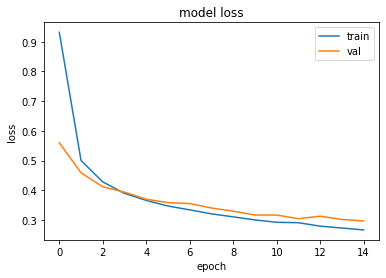

In [34]:
# summarize history for loss
plt.plot(cnn_fit.history['loss'])
plt.plot(cnn_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [35]:
a = model.predict(x_train, batch_size=100)

In [36]:
a.shape

(60000, 10)

In [37]:
argmax(a[1])

0

In [42]:
def final_plot(x_train, ytrue, ypred):
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.tight_layout()
        plt.axis('off')
        if str(cat[argmax(ypred[i])]) == str(cat[ytrue[i]]):
            plt.imshow(x_train.reshape(60000,28,28)[i], alpha = 1.0, cmap=plt.cm.Greys)
        else:
            plt.imshow(x_train.reshape(60000,28,28)[i], alpha = 0.3, cmap=plt.cm.Greys)

        #plt.title(classes[argmax(ypred[i])])
        #plt.xlabel(classes[ytrue[i]])


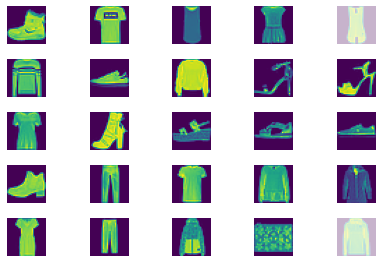

In [43]:
final_plot(x_train, y_train, a)